# Jar Targetting System
## Training Program
Liam Akkerman, Aidan Hunter

In [2]:
# load libraries

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [50]:
# load the dataset

from glob import glob
import bz2
import pickle

dataset = list()

# loads every archive of the dataset
archive_list = glob('../dataset/*.pkl.bz2')
for archive in archive_list:
    with bz2.BZ2File(archive, mode='r') as f:
        dataset.extend(pickle.load(f))

# there may be a better way to do this but it works for now
#   it makes a list of tuples (x, y) of those that aren't testing
#   then unpacks it, zips it, writes it to a list
x_data, y_data = list(zip(*[(a['image'], a['label']) for a in dataset if not a['testing']]))

print('loaded', len(xy_data), 'datapoints')

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

# clear the memeroy beacuse this is big
dataset = None 
x_data = None
y_data = None

loaded 170 datapoints


<class 'tuple'>


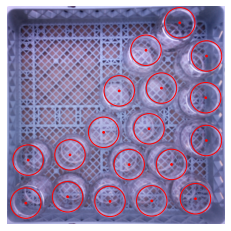

In [58]:
# visualize samples
from random import choice
import matplotlib.patches as patches

rand_image = choice(list(zip(x_train, y_train)))
print(type(rand_image))
while len(rand_image[1]) < 5:    # make sure the chosen one is interesting
    rand_image = choice(list(zip(x_train, y_train)))

fig, ax = plt.subplots()
plt.imshow(rand_image[0])
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.axis('off')

for point in rand_image[1]:
    outline_marker = patches.Circle(point, radius=35, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(outline_marker)
    centre_marker = patches.Circle(point, radius=2, color='r')
    ax.add_patch(centre_marker)

In [ ]:
# define the model layers
# TODO currently this is just the 4th CNN from assigment 3

model = keras.Sequential([
    keras.layers.Input(shape=x_data[0].shape),
    keras.layers.AveragePooling2D(pool_size=6, strides=3),
    keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(units=8, activation='softmax')
])

In [ ]:
# train and evalute the model

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

hist = model.fit(x=train_images, y=train_labels, epochs=10)
loss, acc = model.evaluate(test_images, test_labels)

print('test accuracy:', acc)
print('test loss:', loss)

In [ ]:
# convert and save model

from datetime import datetime

# format is YYYYMMDDHHmm
filename = 'model-' + datetime.now().strftime('%Y%m%d%H%M') + '.tflite'
print('writing', filename)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(filename, 'wb') as f:
    f.write(tflite_model)